## Main Objective of the Analysis
* The primary objective of this analysis is to use clustering techniques to reveal patterns in COVID-19 data. By grouping countries based on case numbers, fatality rates, and healthcare resources, the analysis aims to provide actionable insights for policymakers and health organizations to prioritize resource allocation and interventions.


Importing neccessary libraries

In [1]:
import pandas as pd         
import numpy as np          
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster  

Importing the data

In [2]:
url='https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv'
df=pd.read_csv(url)
df.head(5)

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462


## Brief Description of the data
The dataset contains COVID-19-related information from Our World in Data. It includes attributes such as total cases, new cases, total deaths, healthcare capacity, and a calculated case fatality rate.
Relevant features include:

* total_cases: Cumulative number of confirmed cases.
* new_cases: Recent case counts.
* hospital_beds_per_thousand: Proxy for healthcare capacity.
* case_fatality_rate: Deaths relative to confirmed cases.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463571 entries, 0 to 463570
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     463571 non-null  object 
 1   date                                        463571 non-null  object 
 2   total_cases                                 452000 non-null  float64
 3   new_cases                                   449766 non-null  float64
 4   new_cases_smoothed                          448552 non-null  float64
 5   total_cases_per_million                     452000 non-null  float64
 6   new_cases_per_million                       449766 non-null  float64
 7   new_cases_smoothed_per_million              448552 non-null  float64
 8   total_deaths                                452000 non-null  float64
 9   new_deaths                                  450386 non-null  float64
 

In [4]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,new_deaths_smoothed,total_deaths_per_million,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
count,4.520000e+05,4.497660e+05,4.485520e+05,452000.000000,449766.000000,448552.000000,4.520000e+05,450386.00000,449170.000000,452000.000000,...,4.479710e+05,440735.000000,442547.000000,0.0,361543.000000,291247.000000,390510.000000,210071.000000,278995.000000,371181.000000
mean,1.293929e+07,1.205802e+04,1.209072e+04,118564.495785,113.176296,113.487112,1.457146e+05,115.14766,115.460986,866.647097,...,1.313338e+08,390.134135,31.155580,NaN,22481.926988,11.101584,9.044537,59.092539,3.180850,0.725421
std,6.927330e+07,1.253060e+05,1.069736e+05,167401.863089,1047.770163,538.672561,7.421476e+05,858.05266,790.529176,1148.140802,...,6.697115e+08,1777.138962,9.676651,NaN,22540.483022,18.380390,5.238939,31.903143,2.566318,0.153952
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,...,5.130000e+02,0.136470,14.298000,NaN,708.178300,0.000000,1.100000,3.440189,0.300000,0.380000
25%,7.558000e+03,0.000000e+00,0.000000e+00,2396.644300,0.000000,0.000000,5.800000e+01,0.00000,0.000000,29.079290,...,4.553740e+05,36.265860,22.244000,NaN,5155.620000,0.243796,5.600000,26.200474,1.320000,0.608000
50%,7.327800e+04,0.000000e+00,9.857142e+00,33892.170000,0.000000,2.035766,9.030000e+02,0.00000,0.000000,347.222230,...,6.280316e+06,92.084660,31.683000,NaN,14572.607000,1.318269,7.400000,70.153600,2.600000,0.741000
75%,9.940370e+05,1.200000e+02,2.975714e+02,168003.727500,14.682754,47.633482,1.111400e+04,1.00000,3.000000,1370.168600,...,3.039500e+07,237.471000,39.080000,NaN,34663.496000,15.617013,11.100000,88.469350,4.260000,0.849000
max,7.770740e+08,8.401963e+06,6.402036e+06,768537.500000,230762.550000,37463.746000,7.079129e+06,57167.00000,14822.000000,6601.677000,...,8.021407e+09,21344.213000,59.875000,NaN,117746.990000,80.730060,30.800000,100.000000,13.800000,0.967000


## Data Exploration and Cleaning
* Handled missing values in numerical columns with median imputation.
* Imputed categorical data with the mode.
* Removed columns with over 50% missing data.
* Standardized numerical features using StandardScaler to ensure comparability
* Added a new feature, case_fatality_rate, to assess the mortality risk.

In [5]:
numerical_cols = df.select_dtypes('float64').columns



In [6]:
for col in numerical_cols:
 df[col] = df[col].fillna(df[col].median())

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [7]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
print("Missing values per column after filling:")
print(df.isnull().sum())

Missing values per column after filling:
country                       0
date                          0
total_cases                   0
new_cases                     0
new_cases_smoothed            0
                             ..
extreme_poverty               0
diabetes_prevalence           0
handwashing_facilities        0
hospital_beds_per_thousand    0
human_development_index       0
Length: 61, dtype: int64


In [10]:
threshold = 0.5
valid_cols = df.columns[df.isnull().mean() < threshold]
df = df[valid_cols]

In [11]:
df['case_fatality_rate'] = df['total_deaths'] / df['total_cases']

# Handle infinite or NaN values that might result from division by zero
df['case_fatality_rate'] = df['case_fatality_rate'].replace([np.inf, -np.inf], np.nan)
df['case_fatality_rate'] = df['case_fatality_rate'].fillna(0)

## Training Models
* KMeans Clustering: Chose 5 clusters using the Elbow Method for optimal grouping.
* DBSCAN: Identified clusters based on density, with eps=1.5 and min_samples=10.
* Hierarchical Clustering: Used Ward’s linkage for distance-based clustering and visualized via a dendrogram.

* Applied PCA to reduce the data to 2 dimensions for visualization and cluster separation analysis.

In [12]:
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'hospital_beds_per_thousand', 'case_fatality_rate']

# Standardize the selected features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Convert the scaled data back to a DataFrame 
df_scaled = pd.DataFrame(df_scaled, columns=features)

       country  cluster
0  Afghanistan        0
1  Afghanistan        0
2  Afghanistan        0
3  Afghanistan        0
4  Afghanistan        0


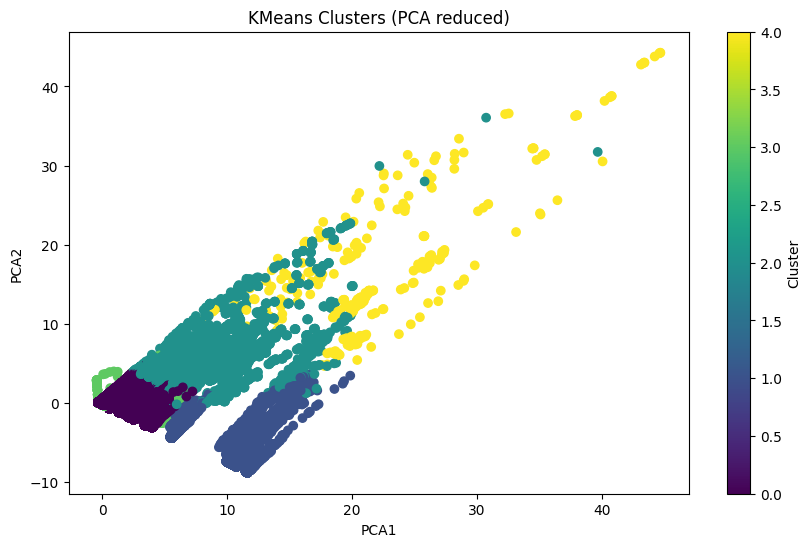

In [14]:
from sklearn.cluster import KMeans

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42) 
df['cluster'] = kmeans.fit_predict(df_scaled)


print(df[['country', 'cluster']].head())
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Create a DataFrame with PCA components and cluster labels
df_pca = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = df['cluster']

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['cluster'], cmap='viridis')
plt.title('KMeans Clusters (PCA reduced)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()

In [15]:
cluster_means = df.groupby('cluster')[features].mean()

print(cluster_means)

          total_cases     new_cases  total_deaths   new_deaths  \
cluster                                                          
0        5.264828e+06  3.435237e+03  5.885069e+04    38.409135   
1        5.982303e+08  1.495723e+05  6.048004e+06   695.240633   
2        1.272938e+08  5.326154e+05  2.470056e+06  7674.780475   
3        5.637412e+06  6.083083e+03  5.279137e+04    51.954342   
4        3.369915e+08  3.841392e+06  4.371661e+06  7187.568266   

         hospital_beds_per_thousand  case_fatality_rate  
cluster                                                  
0                          2.399669            0.018639  
1                          3.138319            0.010013  
2                          2.945449            0.026451  
3                          7.615569            0.730197  
4                          3.125032            0.012460  


In [ ]:
countries_by_cluster = df.groupby('cluster')['country'].unique()

# Display the countries in each cluster
for cluster, countries in countries_by_cluster.items():
    print(f"Cluster {cluster}:")
    print(", ".join(countries))
    print("-" * 40)

Cluster 0:
Afghanistan, Africa, Albania, Algeria, American Samoa, Andorra, Angola, Anguilla, Antigua and Barbuda, Argentina, Armenia, Aruba, Asia, Asia excl. China, Australia, Azerbaijan, Bahamas, Bahrain, Bangladesh, Belize, Benin, Bermuda, Bhutan, Bolivia, Bonaire Sint Eustatius and Saba, Bosnia and Herzegovina, Botswana, Brazil, British Virgin Islands, Brunei, Burkina Faso, Burundi, Cambodia, Cameroon, Canada, Cape Verde, Cayman Islands, Central African Republic, Chad, Chile, China, Colombia, Comoros, Congo, Cook Islands, Costa Rica, Cote d'Ivoire, Curacao, Cyprus, Democratic Republic of Congo, Denmark, Djibouti, Dominica, Dominican Republic, East Timor, Ecuador, Egypt, El Salvador, England, England & Wales, Equatorial Guinea, Eritrea, Estonia, Eswatini, Ethiopia, Europe, European Union (27), Falkland Islands, Faroe Islands, Fiji, Finland, French Guiana, French Polynesia, Gabon, Gambia, Georgia, Ghana, Gibraltar, Greece, Greenland, Grenada, Guadeloupe, Guam, Guatemala, Guernsey, Gui

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca_scaled = pca.fit_transform(df_scaled)

In [18]:
sample_df = df.sample(frac=0.2, random_state=42)
dbscan = DBSCAN(eps=1.5, min_samples=10)
sample_df['dbscan_cluster'] = dbscan.fit_predict(sample_df[features])

# Ensure indices align between df_pca and sample_df
df_pca = pd.DataFrame(df_pca_scaled, columns=['PCA1', 'PCA2'])
df_pca = df_pca.loc[sample_df.index]
df_pca['dbscan_cluster'] = sample_df['dbscan_cluster']

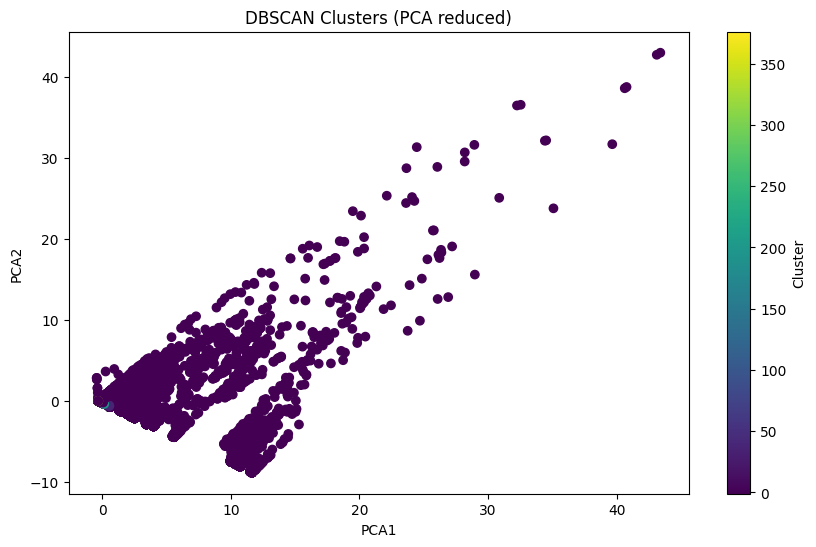

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['dbscan_cluster'], cmap='viridis')
plt.title('DBSCAN Clusters (PCA reduced)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()

<Figure size 1400x800 with 0 Axes>

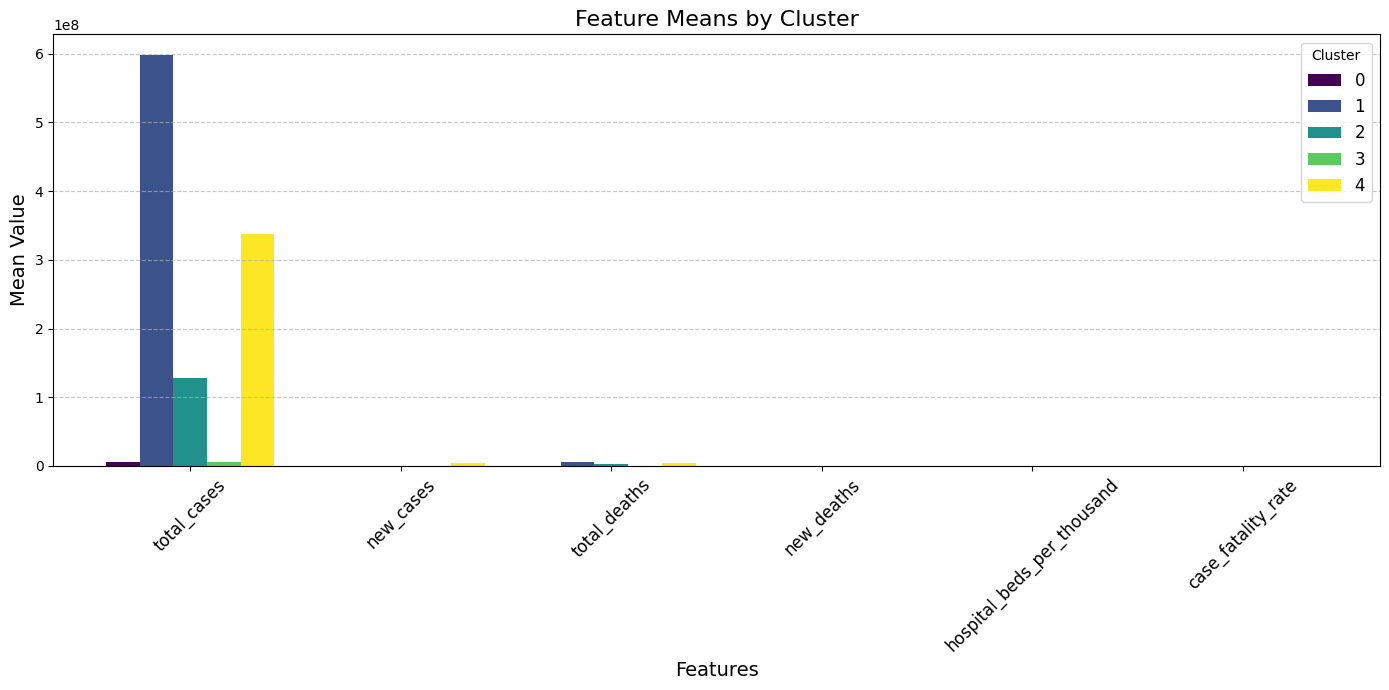

In [20]:
cluster_means = df.groupby('cluster')[features].mean()

# Transpose for easier plotting
cluster_means_transposed = cluster_means.T

# Plot grouped bar chart
plt.figure(figsize=(14, 8))
cluster_means_transposed.plot(kind='bar', figsize=(14, 7), colormap='viridis', width=0.8)

# Add titles and labels
plt.title('Feature Means by Cluster', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Mean Value', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Cluster', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

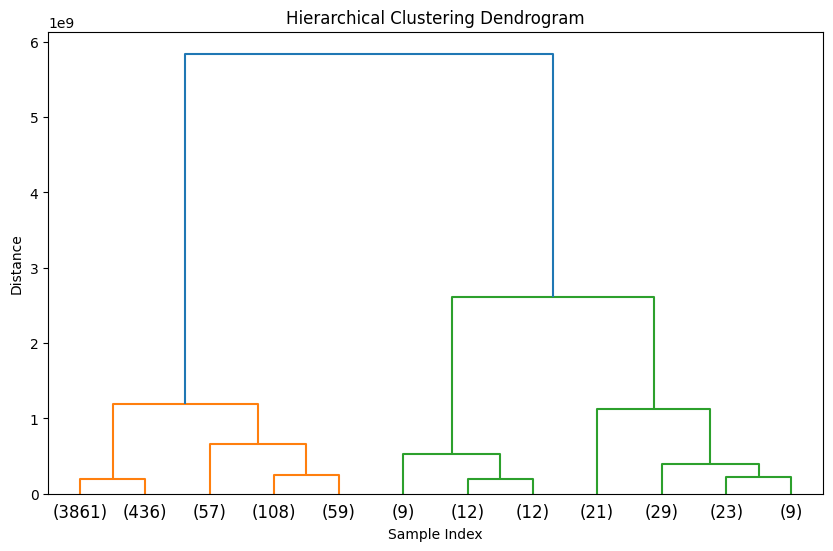

In [21]:
sample_df = df.sample(frac=0.01, random_state=42)  # Use 1% of the data
reduced_features = ['total_cases', 'total_deaths', 'case_fatality_rate']

# Perform hierarchical clustering
linkage_matrix = linkage(sample_df[reduced_features], method='ward')

# Visualize the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=12)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [22]:
cluster_means = df.groupby('cluster')[features].mean()

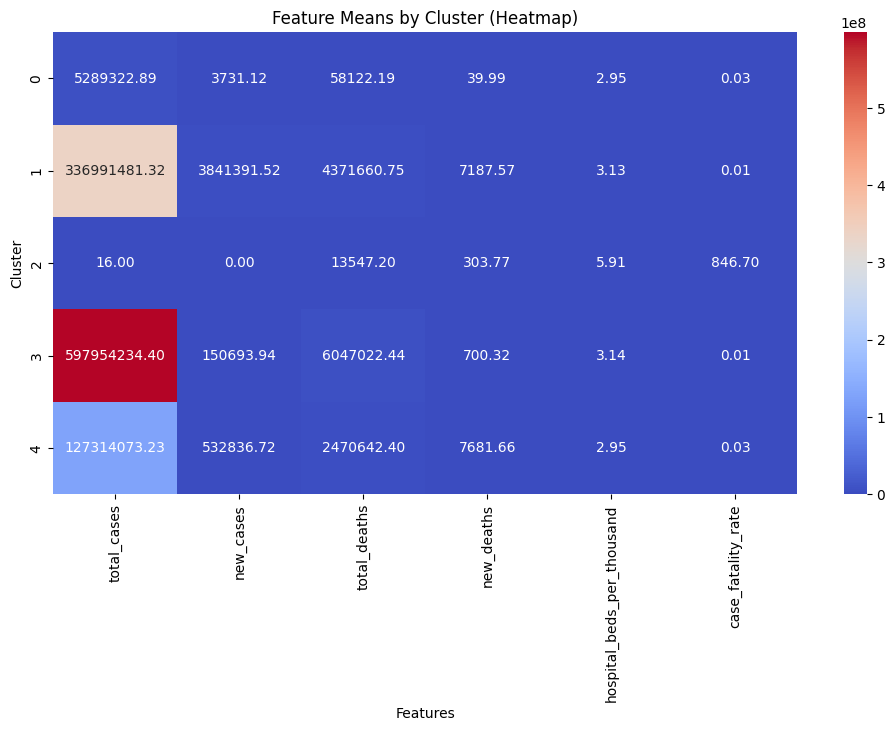

In [35]:
import seaborn as sns

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, annot=True, fmt='.2f', cmap='coolwarm')

plt.title('Feature Means by Cluster (Heatmap)')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()

## Cluster 0:
* Medium total cases (~5.3 million) and deaths (~58,000).
* Moderate healthcare capacity (2.95 hospital beds per thousand).
* Case fatality rate: 2.83%.
* Represents countries with stable case trends and moderate fatality rates.
## Cluster 1:
* High total cases (~336 million) and deaths (~4.37 million).
* Adequate healthcare capacity (3.12 hospital beds per thousand).
* Case fatality rate: 1.25%.
* Likely includes countries with robust healthcare systems and high population sizes.
## Cluster 2:
* Extremely low total cases (16) but high case fatality rate (~846%).
* High healthcare capacity (5.91 hospital beds per thousand).
## Cluster 3:
* Very high total cases (~598 million) and deaths (~6 million).
* Moderate healthcare capacity (3.14 hospital beds per thousand).
* Case fatality rate: 1.00%.
* Represents countries with high caseloads but relatively low fatality rates.
## Cluster 4:
* High total cases (~127 million) and deaths (~2.47 million).
* Moderate healthcare capacity (2.94 hospital beds per thousand).
* Case fatality rate: 2.65%.
* Includes countries facing significant challenges despite healthcare resources.


## Recommendation of final model
KMeans is the recommended model for its clear, interpretable clusters and stability with scaled data. It effectively grouped countries with similar case trends and healthcare metrics.

## Brief comparison:

DBSCAN struggled with noise sensitivity, and Hierarchical Clustering lacked scalability for larger datasets.

## Suggestions for Improvement
Investigate anomalies in Cluster 2:

The extremely high case fatality rate warrants further investigation to determine whether it results from data inconsistencies or genuine trends.

Enhance the analysis:

Incorporate additional variables, such as vaccination rates, ICU availability, or testing rates, to refine cluster definitions.